<a href="https://colab.research.google.com/github/elleish/3D-barcode-generator/blob/main/3Dbarcode_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get install ghostscript
# !pip install treepoem
# !pip install elasticdeform

In [2]:
import numpy as np
import os, treepoem, elasticdeform
from PIL import Image

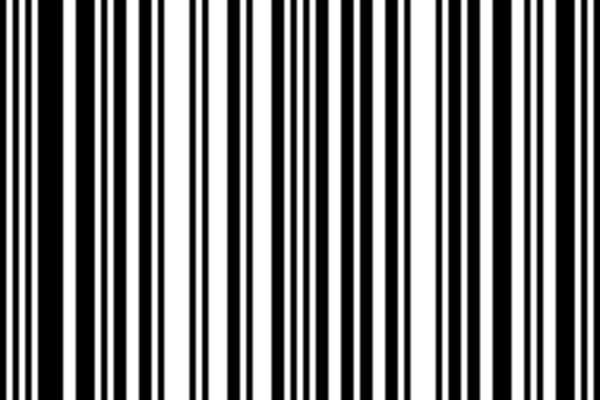

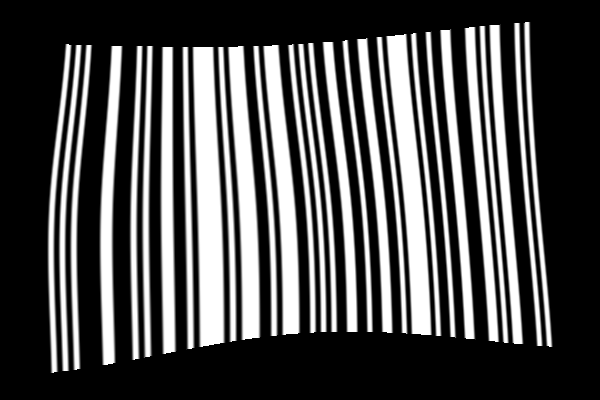

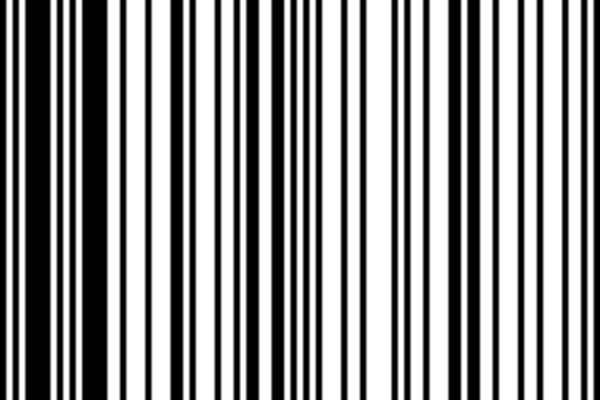

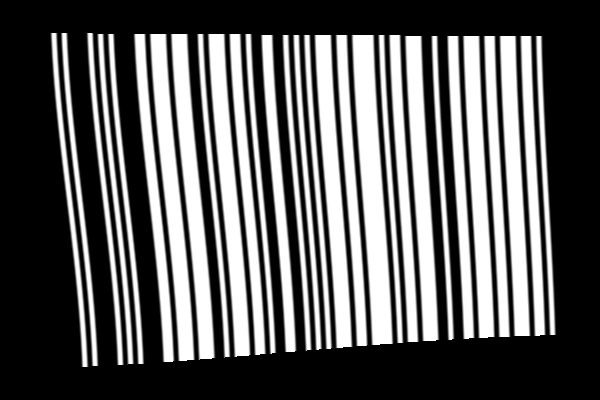

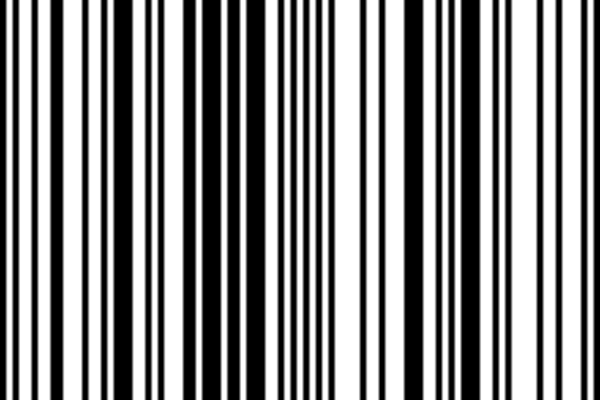

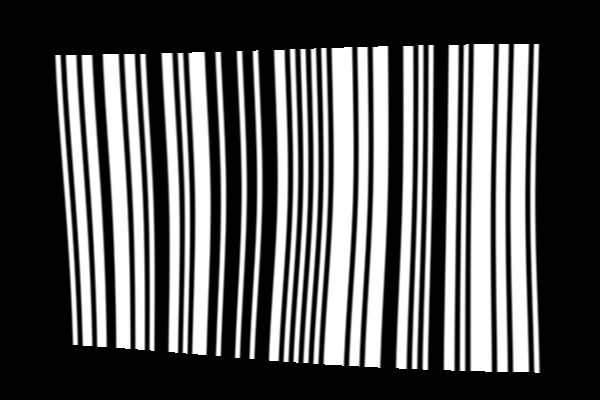

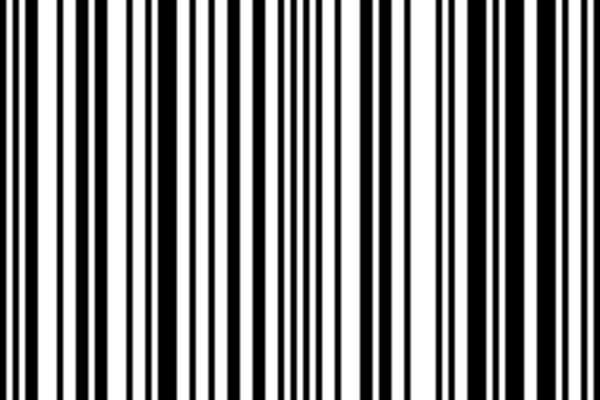

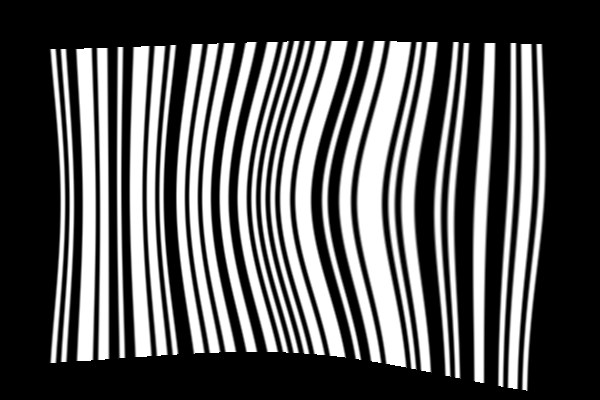

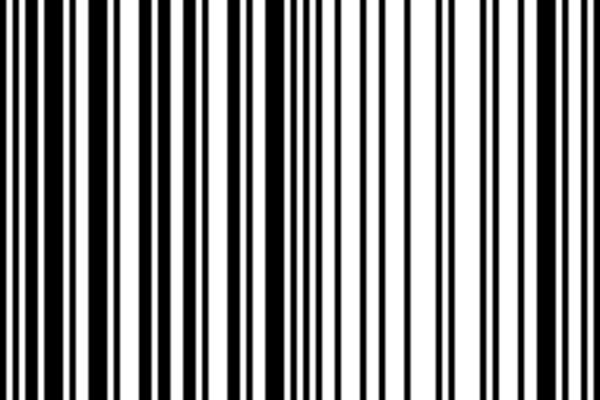

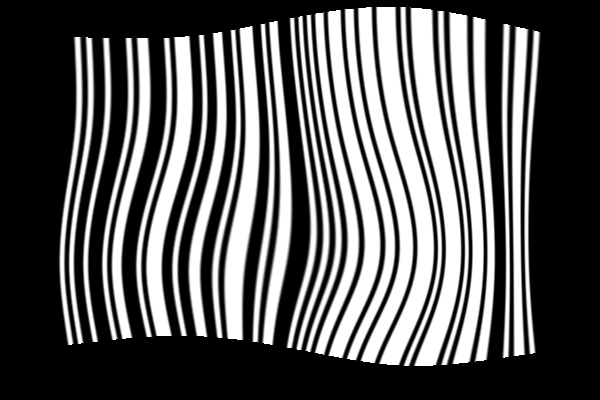

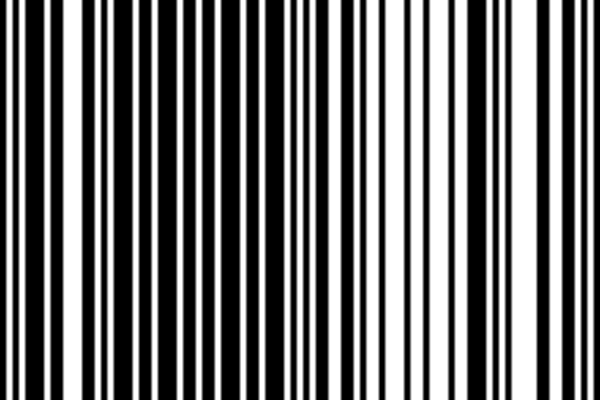

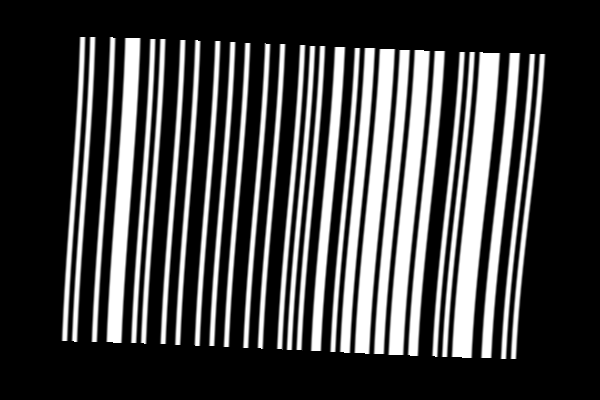

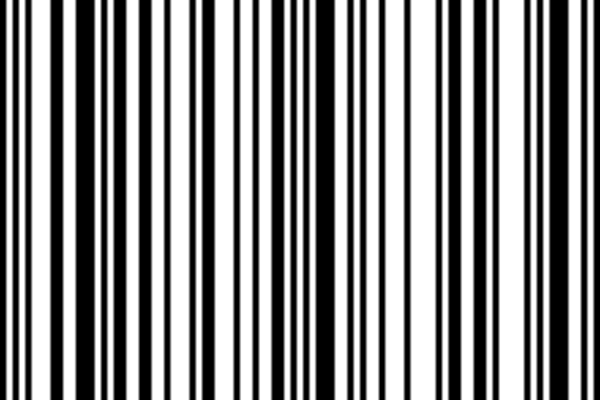

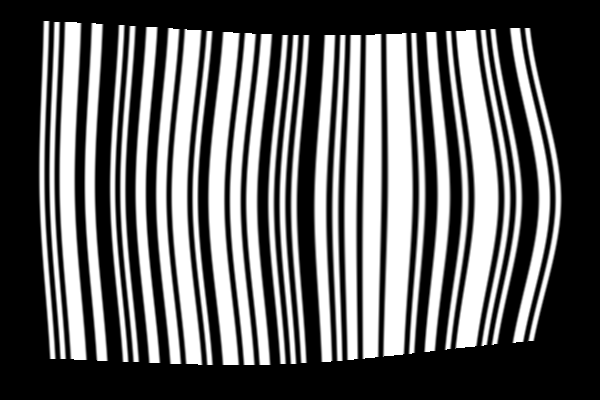

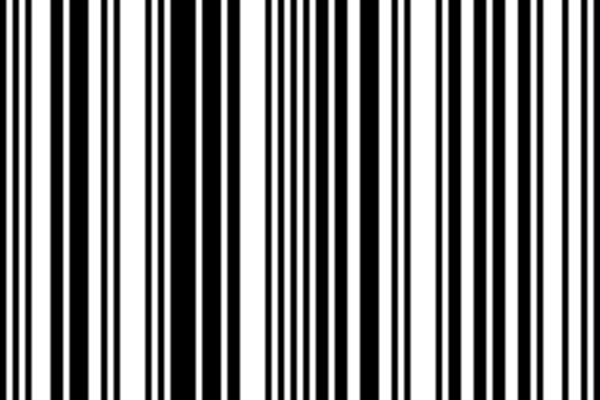

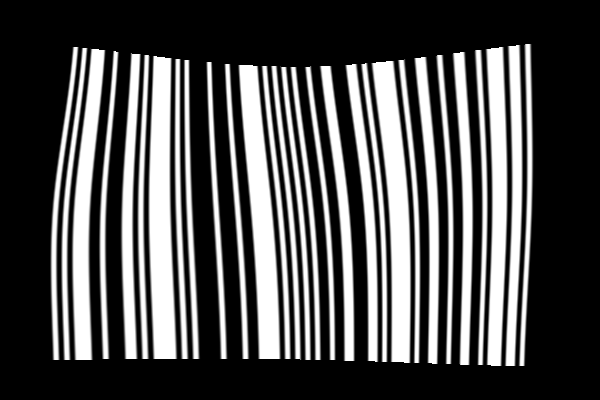

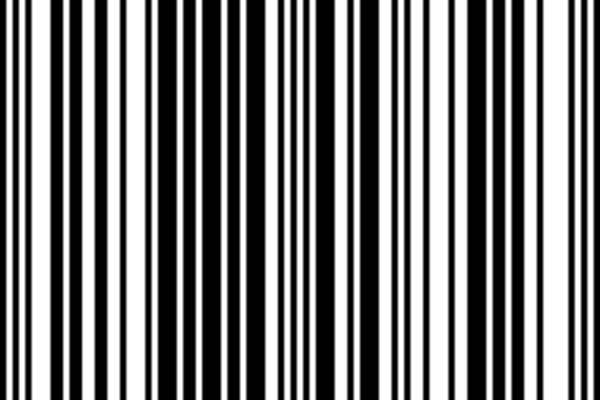

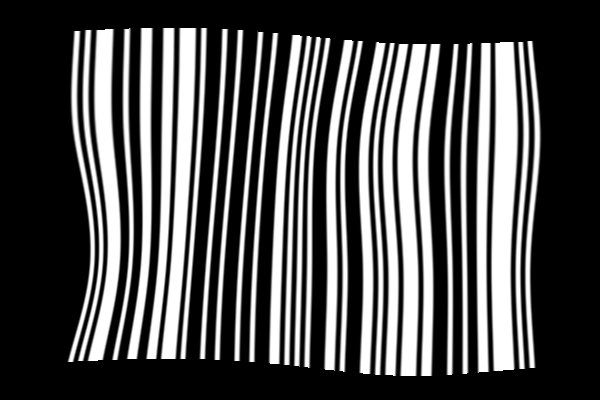

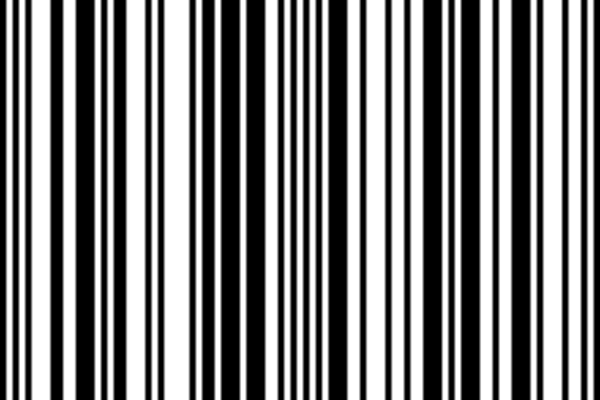

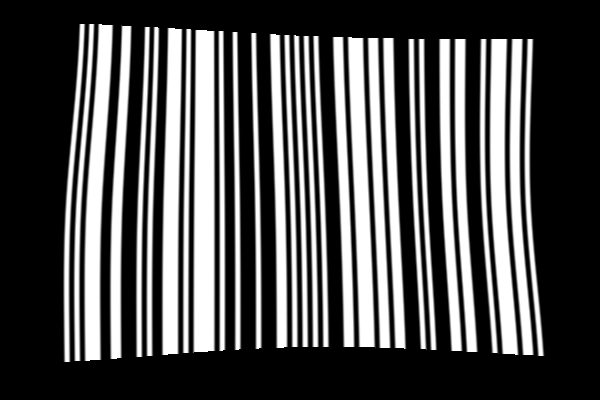

In [6]:
# os.mkdir('barcodes')

def random_code_generator():
     return ''.join(np.random.randint(0, 9, size=12, dtype=int).astype(str).tolist())

for imgno in range(10):
    code = random_code_generator()
    barcode = treepoem.generate_barcode(barcode_type='ean13',data=code).resize((600,400))
    barcode_bw = np.array(barcode)[:,:,0]
    barcode_distorted = elasticdeform.deform_random_grid(barcode_bw,
                        sigma=np.random.randint(11, 22), points=np.random.randint(2, 5), zoom=0.8, order=1)
    barcode_distorted = Image.fromarray(barcode_distorted).convert('RGB')
    barcode_distorted.save('barcodes/' + code + '.png')
    display(barcode)
    display(barcode_distorted)




In [4]:
!zip barcodes ean13/*.png

	zip warning: name not matched: ean13/*.png

zip error: Nothing to do! (barcodes.zip)


In [5]:
!pip3 freeze > requirements.txt